<a href="https://colab.research.google.com/github/sanjeev-12/HCV-PREDICTION/blob/main/c%26l.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install catboost lightgbm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold
from catboost import CatBoostClassifier
import lightgbm as lgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/HepatitisCdata.csv")
data


,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [ ]:
# Check column names
print(data.columns)

# Remove leading/trailing whitespace from column names (if needed)
data.columns = data.columns.str.strip()

# Check againa
print(data.columns)


Index(['Unnamed: 0', 'Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST',
       'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT'],
      dtype='object')
Index(['Unnamed: 0', 'Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST',
       'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT'],
      dtype='object')


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
sns.set_palette('bright')

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/HepatitisCdata.csv').drop(['Unnamed: 0'], axis=1)
data

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [ ]:
data[['Target', 'Category']] = data['Category'].str.split('=', expand=True)
data = data.drop(['Category'], axis=1)
data['Sex'] = data['Sex'].replace({'m':0, 'f':1})
data

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Target
0,32,0,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,0
1,32,0,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,0
2,32,0,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,0
3,32,0,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,0
4,32,0,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,62,1,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5,3
611,64,1,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3,3
612,64,1,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0,3
613,46,1,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0,3


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     615 non-null    int64  
 1   Sex     615 non-null    int64  
 2   ALB     614 non-null    float64
 3   ALP     597 non-null    float64
 4   ALT     614 non-null    float64
 5   AST     615 non-null    float64
 6   BIL     615 non-null    float64
 7   CHE     615 non-null    float64
 8   CHOL    605 non-null    float64
 9   CREA    615 non-null    float64
 10  GGT     615 non-null    float64
 11  PROT    614 non-null    float64
 12  Target  615 non-null    object 
dtypes: float64(10), int64(2), object(1)
memory usage: 62.6+ KB


In [ ]:
data.isna().sum()

Age        0
Sex        0
ALB        1
ALP       18
ALT        1
AST        0
BIL        0
CHE        0
CHOL      10
CREA       0
GGT        0
PROT       1
Target     0
dtype: int64

In [ ]:
data.dropna(inplace=True)
data.isna().sum()

Age       0
Sex       0
ALB       0
ALP       0
ALT       0
AST       0
BIL       0
CHE       0
CHOL      0
CREA      0
GGT       0
PROT      0
Target    0
dtype: int64

In [ ]:
data['Target'].value_counts()

0     526
3      24
1      20
2      12
0s      7
Name: Target, dtype: int64

<Axes: xlabel='Target', ylabel='count'>

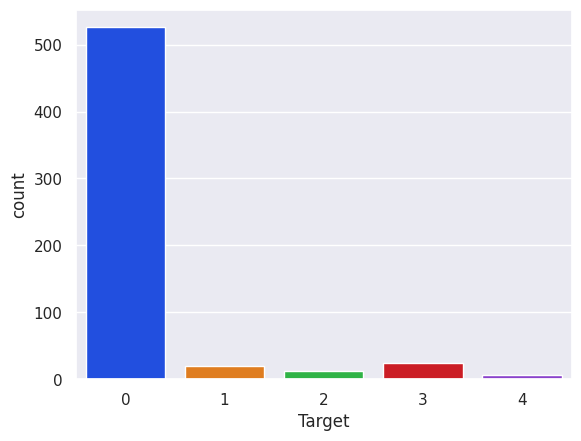

In [ ]:
sns.countplot(data=data, x='Target')

In [ ]:
data['Target'] = data['Target'].replace({'0s':4}).astype(int)
data.dtypes

Age         int64
Sex         int64
ALB       float64
ALP       float64
ALT       float64
AST       float64
BIL       float64
CHE       float64
CHOL      float64
CREA      float64
GGT       float64
PROT      float64
Target      int64
dtype: object

In [ ]:
data.columns

Index(['Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA',
       'GGT', 'PROT', 'Target'],
      dtype='object')

In [ ]:
# Split the data into features (X) and target (y)
X = data.drop('Target', axis=1)  # Replace 'target_column' with the actual target column name
y = data['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the CatBoost model
catboost_model = CatBoostClassifier()
catboost_model.fit(X_train, y_train)

# Train the LightGBM model
lgbm_model = LGBMClassifier()
lgbm_model.fit(X_train, y_train)


Learning rate set to 0.076146
0:	learn: 1.4170032	total: 72.7ms	remaining: 1m 12s
1:	learn: 1.3055947	total: 93.6ms	remaining: 46.7s
2:	learn: 1.1939499	total: 112ms	remaining: 37.2s
3:	learn: 1.0869101	total: 134ms	remaining: 33.3s
4:	learn: 0.9882104	total: 151ms	remaining: 30.1s
5:	learn: 0.9058450	total: 164ms	remaining: 27.1s
6:	learn: 0.8397955	total: 179ms	remaining: 25.3s
7:	learn: 0.7820795	total: 200ms	remaining: 24.8s
8:	learn: 0.7252470	total: 219ms	remaining: 24.1s
9:	learn: 0.6761643	total: 236ms	remaining: 23.4s
10:	learn: 0.6326368	total: 255ms	remaining: 22.9s
11:	learn: 0.5936244	total: 275ms	remaining: 22.6s
12:	learn: 0.5589240	total: 297ms	remaining: 22.5s
13:	learn: 0.5242184	total: 318ms	remaining: 22.4s
14:	learn: 0.4987771	total: 334ms	remaining: 22s
15:	learn: 0.4744381	total: 351ms	remaining: 21.6s
16:	learn: 0.4466556	total: 366ms	remaining: 21.1s
17:	learn: 0.4256159	total: 384ms	remaining: 20.9s
18:	learn: 0.4049113	total: 403ms	remaining: 20.8s
19:	learn:

LGBMClassifier()

catboost and lightgmb

In [ ]:

import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold
from catboost import CatBoostClassifier
import lightgbm as lgb
cb_model = CatBoostClassifier(loss_function='MultiClass', verbose=False)
lgb_model = lgb.LGBMClassifier(objective='multiclass', num_class=5)

# Preprocess the Data
X_train = data.drop(['Target'], axis=1)
y_train = data['Target']

# Train the Models with 2-fold Cross-Validation
kfold = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)  # Change n_splits to 2

models = {
    'CatBoost': cb_model,
    'LightGBM': lgb_model
}
ensemble_preds = np.zeros((len(X_train), len(models)))

fold_scores = []

for fold_idx, (train_idx, val_idx) in enumerate(kfold.split(X_train, y_train)):
    X_fold_train, X_fold_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_fold_train, y_fold_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    fold_scores_itr = []

    print('='*70)
    for model_name, model in models.items():
        model.fit(X_fold_train, y_fold_train)
        fold_probs = model.predict_proba(X_fold_val)  # Use predict_proba for probability estimates

        # Calculate accuracy for the fold (for reference)
        fold_accuracy = accuracy_score(y_fold_val, np.argmax(fold_probs, axis=1))

        # Add accuracy values to the lists
        fold_scores.append((model_name, fold_idx, fold_accuracy))
        fold_scores_itr.append(fold_accuracy)

        print(f"FOLD {fold_idx} ==> {model_name} ==> Accuracy: {fold_accuracy:.4f}")

        # Store the probabilities for this fold
        ensemble_preds[val_idx, list(models.keys()).index(model_name)] = fold_probs[:, 1]  # Store the probabilities of class 1

    print('-'*70)
    print(f'Mean Accuracy of FOLD {fold_idx} == {np.mean(fold_scores_itr):.4f}')

# Combine probabilities from different models in the ensemble and calculate ensemble predictions
ensemble_probabilities = np.mean(ensemble_preds, axis=1)
ensemble_predictions = np.round(ensemble_probabilities).astype(int)

# Evaluate the ensemble performance
ensemble_accuracy = accuracy_score(y_train, ensemble_predictions)
print(f"Ensemble Model Accuracy: {ensemble_accuracy:.4f}")

# Calculate precision, recall, and F1-score for the ensemble model
precision = precision_score(y_train, ensemble_predictions, average='weighted')
recall = recall_score(y_train, ensemble_predictions, average='weighted')
f1 = f1_score(y_train, ensemble_predictions, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


FOLD 0 ==> CatBoost ==> Accuracy: 0.9559
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000074 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 294, number of used features: 12
[LightGBM] [Info] Start training from score -0.111426
[LightGBM] [Info] Start training from score -3.380995
[LightGBM] [Info] Start training from score -3.891820
[LightGBM] [Info] Start training from score -3.198673
[LightGBM] [Info] Start training from score -4.584967
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


knn and svm

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

# Load your dataset here, replace 'your_dataset.csv' with the actual file path
# Example: data = pd.read_csv('your_dataset.csv')

# Define KNN and SVM models
knn_model = KNeighborsClassifier(n_neighbors=5)
svm_model = SVC(kernel='linear', probability=True)

# Define the meta-classifier (e.g., Logistic Regression)
meta_classifier = LogisticRegression()

# Step 1: Preprocess the Data
X_train = data.drop(['Target'], axis=1)
y_train = data['Target']

# Step 2: Train the Models with k-fold Cross-Validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

models = {
    'KNN': knn_model,
    'SVM': svm_model
}

# Create arrays to store the model predictions
knn_preds = np.zeros((len(X_train), len(models)))
svm_preds = np.zeros((len(X_train), len(models)))

fold_scores = []
for fold_idx, (train_idx, val_idx) in enumerate(kfold.split(X_train, y_train)):
    X_fold_train, X_fold_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_fold_train, y_fold_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
    fold_scores_itr = []
    print('='*70)
    for model_name, model in models.items():
        # Fit the model to the training data
        model_1 = model
        model_1.fit(X_fold_train, y_fold_train)
        # Apply a random transformation to the features (data augmentation)
        X_fold_train_augmented = X_fold_train + np.random.normal(0, 0.1, X_fold_train.shape)
        # Generate probabilities on the validation data
        fold_probs = model_1.predict_proba(X_fold_val)
        # Calculate accuracy for the fold (for reference)
        fold_accuracy = accuracy_score(y_fold_val, np.argmax(fold_probs, axis=1))
        # Add accuracy values to the lists
        fold_scores.append((model_name, fold_idx, fold_accuracy))
        fold_scores_itr.append(fold_accuracy)
        print(f"FOLD {fold_idx} ==> {model_name} ==> Accuracy: {fold_accuracy:.4f}")
        # Store the probabilities for this fold
        if model_name == 'KNN':
            knn_preds[val_idx, list(models.keys()).index(model_name)] = fold_probs[:, 1]
        elif model_name == 'SVM':
            svm_preds[val_idx, list(models.keys()).index(model_name)] = fold_probs[:, 1]
    print('-'*70)
    print(f'Mean Accuracy of FOLD {fold_idx} == {np.mean(fold_scores_itr):.4f}')
# Stack the KNN and SVM probabilities vertically
stacked_preds = np.hstack((knn_preds, svm_preds))
# Train the meta-classifier on the stacked predictions
meta_classifier.fit(stacked_preds, y_train)
# Make predictions using the meta-classifier
meta_preds = meta_classifier.predict(stacked_preds)
# Evaluate the ensemble performance
ensemble_accuracy = accuracy_score(y_train, meta_preds)
print(f"Ensemble Model Accuracy: {ensemble_accuracy:.4f}")
precision = precision_score(y_train, meta_preds, average='weighted')
recall = recall_score(y_train, meta_preds, average='weighted')
f1 = f1_score(y_train, meta_preds, average='weighted')
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


FOLD 0 ==> KNN ==> Accuracy: 0.9237
FOLD 0 ==> SVM ==> Accuracy: 0.9576
----------------------------------------------------------------------
Mean Accuracy of FOLD 0 == 0.9407
FOLD 1 ==> KNN ==> Accuracy: 0.9322
FOLD 1 ==> SVM ==> Accuracy: 0.9407
----------------------------------------------------------------------
Mean Accuracy of FOLD 1 == 0.9364
FOLD 2 ==> KNN ==> Accuracy: 0.9153
FOLD 2 ==> SVM ==> Accuracy: 0.9576
----------------------------------------------------------------------
Mean Accuracy of FOLD 2 == 0.9364
FOLD 3 ==> KNN ==> Accuracy: 0.9068
FOLD 3 ==> SVM ==> Accuracy: 0.9407
----------------------------------------------------------------------
Mean Accuracy of FOLD 3 == 0.9237
FOLD 4 ==> KNN ==> Accuracy: 0.9145
FOLD 4 ==> SVM ==> Accuracy: 0.9231
----------------------------------------------------------------------
Mean Accuracy of FOLD 4 == 0.9188
Ensemble Model Accuracy: 0.9049
Precision: 0.8368
Recall: 0.9049
F1 Score: 0.8695


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


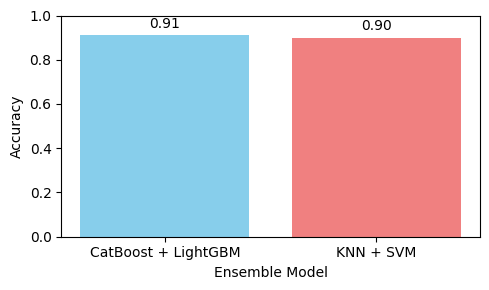

In [ ]:
import matplotlib.pyplot as plt

# Define model/experiment names and their corresponding accuracy scores
models = ['CatBoost + LightGBM', 'KNN + SVM']
accuracies = [0.91, 0.90]

# Define colors for the bars
colors = ['skyblue', 'lightcoral']

# Create a bar chart with custom colors
plt.figure(figsize=(5, 3))  # Adjust the figure size as needed
bars = plt.bar(models, accuracies, color=colors)
plt.xlabel('Ensemble Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set the y-axis limit (0 to 1 for accuracy)

# Display the accuracy scores on top of the bars
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, accuracy + 0.02, f'{accuracy:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [ ]:
catboost_preds = catboost_model.predict(X_test)
lgbm_preds = lgbm_model.predict(X_test)


In [ ]:
hybrid_preds = np.round((catboost_preds + lgbm_preds) / 2)
